# WeatherPy

Utilizing the Open Weather API on July 18, 2018, data surverying 557 random cities was compiled on humidity%, temperature (F), cloud%, and wind speed (mph). In surveying the data, there (unsurprisingly) appeared to be a correlation between latitude and temperature. When visualized in as scatter plot, the points formed a curve similar to a standard distribution with the Tropic of Cancer (23°26ʹ Latitude) at the center. Temperature tended to decrease the further latitude position the city fell from this point. This makes sense considering that the data was compiled during the Northern Hemisphere summer.

Cloud cover based on Latitude was a striking visualization. Latitude did not appear to have a strong influence on cloudiness, rather it raised questions about how cloud cover it measured. When compared to the visuals of humidity and wind speed, which both are rather nebulous, cloud levels seemed to bucket in particular % levels. The resulting image appeared to be a series of lines with scattered points between them. These "lines" of data populated around 0%, 20%, 40%, 75%, and 90%. Since cloud cover is generally measured in oktas, which is on a scale of 0-8, it follows that visualzations would populate along particular lines.

Though the data was compiled randomly, it was striking to see a preference for cities in the Northern Hemisphere. Latitude values ranged from -60 to 80 with what looked like 2/3 of the data points populating >0. In a way, the data visualized the landmass distibution of Earth itself: ~68% Northern Hemisphere, ~32% Southern Hemisphere. This indicates that we would see similar patterns when surveying Longitude data, as the landmass distribution is roughly the same East vs West.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [3]:
#create an empty list to store dictionaries in order to build DataFrame
w_list = []

# OpenWeatherMap API Key
api_key = api_keys.api_key

#establish base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#outline parameters
params = {"APPID": api_key,
         "units": "Imperial"}

print("Initializing Data Retrieval")
print("-" * len("Initializing Data Retrieval"))

for index, city in enumerate(cities):
    while True:
        try:
            params["q"] = city
            response = requests.get(url, params=params).json()
            if response['cod'] == '404':
                print('City not found. Moving on.')
                time.sleep(1)
            else:
                #print(f'Retrieving record {index} of {len(cities)} | {city}, id:{test["id"]}')
                print(f'Retrieving record {index + 1} of {len(cities)} | {city}, id:{response["id"]}')
                weather = {'City Name': response['name'],
                           'Cloud':response['clouds']['all'],
                           'Country': response['sys']['country'],
                           'Date': response['dt'],
                           'Humidity': response['main']['humidity'],
                           'Latitude': response['coord']['lat'],
                           'Longitude': response['coord']['lon'],
                           'Maximum Temperature': response['main']['temp_max'], 'Wind Speed': response['wind']['speed']}
                w_list.append(weather)
                time.sleep(1)
        except TimeoutError:
                sleep(10)
                continue
        break
                
            
        
print("-" * len("Data retrieval complete"))
print("Data retrieval complete")

weather_raw = pd.DataFrame(w_list)
weather_raw.head()
    

Initializing Data Retrieval
---------------------------
Retrieving record 1 of 620 | khatanga, id:2022572
Retrieving record 2 of 620 | tuktoyaktuk, id:6170031
Retrieving record 3 of 620 | victoria, id:1733782
Retrieving record 4 of 620 | bodden town, id:3580733
Retrieving record 5 of 620 | cermik, id:318766
Retrieving record 6 of 620 | naze, id:2337542
City not found. Moving on.
Retrieving record 8 of 620 | alofi, id:4036284
Retrieving record 9 of 620 | thompson, id:6165406
Retrieving record 10 of 620 | carazinho, id:3466978
Retrieving record 11 of 620 | cumberland, id:5221703
Retrieving record 12 of 620 | hilo, id:5855927
City not found. Moving on.
Retrieving record 14 of 620 | saint-philippe, id:6138908
Retrieving record 15 of 620 | saint-ambroise, id:3025602
Retrieving record 16 of 620 | longyearbyen, id:2729907
Retrieving record 17 of 620 | vanavara, id:2013727
Retrieving record 18 of 620 | bluff, id:2175403
Retrieving record 19 of 620 | paracuru, id:3393115
Retrieving record 20 of

Retrieving record 170 of 620 | tual, id:1623197
City not found. Moving on.
Retrieving record 172 of 620 | fairbanks, id:5861897
Retrieving record 173 of 620 | ziro, id:1252668
City not found. Moving on.
Retrieving record 175 of 620 | vostok, id:2013279
City not found. Moving on.
Retrieving record 177 of 620 | dunedin, id:2191562
Retrieving record 178 of 620 | mar del plata, id:3863379
Retrieving record 179 of 620 | mastung, id:1170706
Retrieving record 180 of 620 | nizhniy kuranakh, id:2019135
Retrieving record 181 of 620 | whitehorse, id:6180550
Retrieving record 182 of 620 | sturgeon bay, id:5274867
Retrieving record 183 of 620 | sao felix do xingu, id:3388847
Retrieving record 184 of 620 | jiuquan, id:1280957
Retrieving record 185 of 620 | palmer, id:2067070
Retrieving record 186 of 620 | samarai, id:2132606
Retrieving record 187 of 620 | vila franca do campo, id:3372472
Retrieving record 188 of 620 | khorixas, id:3356213
Retrieving record 189 of 620 | road town, id:3577430
Retrievi

Retrieving record 336 of 620 | guerrero negro, id:4021858
Retrieving record 337 of 620 | starosubkhangulovo, id:488618
Retrieving record 338 of 620 | healesville, id:2163701
Retrieving record 339 of 620 | sao fidelis, id:3449195
City not found. Moving on.
Retrieving record 341 of 620 | quatre cocos, id:1106643
Retrieving record 342 of 620 | illela, id:2336237
Retrieving record 343 of 620 | bonavista, id:5905393
Retrieving record 344 of 620 | namanga, id:184570
Retrieving record 345 of 620 | sao joao da barra, id:3448903
Retrieving record 346 of 620 | kieta, id:2094027
Retrieving record 347 of 620 | nurota, id:1513087
Retrieving record 348 of 620 | egvekinot, id:4031742
Retrieving record 349 of 620 | requena, id:2511930
Retrieving record 350 of 620 | geraldton, id:5960603
Retrieving record 351 of 620 | dingle, id:1714733
City not found. Moving on.
Retrieving record 353 of 620 | qeshm, id:119374
Retrieving record 354 of 620 | sorland, id:3137469
Retrieving record 355 of 620 | ahipara, id

Retrieving record 503 of 620 | kermanshah, id:128226
Retrieving record 504 of 620 | sooke, id:6151264
Retrieving record 505 of 620 | orcopampa, id:3933986
Retrieving record 506 of 620 | hobyo, id:57000
Retrieving record 507 of 620 | ocampo, id:1697332
Retrieving record 508 of 620 | saint anthony, id:5606187
Retrieving record 509 of 620 | santa rosa, id:3835994
Retrieving record 510 of 620 | diego de almagro, id:3892454
Retrieving record 511 of 620 | praia da vitoria, id:3372760
Retrieving record 512 of 620 | reconquista, id:3429594
Retrieving record 513 of 620 | matagami, id:2335713
Retrieving record 514 of 620 | saint-leu, id:6690297
Retrieving record 515 of 620 | carroll, id:2172210
Retrieving record 516 of 620 | westerland, id:2757220
Retrieving record 517 of 620 | quimper, id:2984701
Retrieving record 518 of 620 | dunmore east, id:2964492
Retrieving record 519 of 620 | bucerias, id:4016734
Retrieving record 520 of 620 | laizhou, id:1804578
Retrieving record 521 of 620 | bundaberg, 

,City Name,Cloud,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Khatanga,48,RU,1531977064,78,71.98,102.47,42.33,17.38
1,Tuktoyaktuk,75,CA,1531972800,48,69.44,-133.03,64.40,12.75
2,Victoria,75,BN,1531974600,75,5.28,115.24,91.40,3.36
3,Bodden Town,0,KY,1531976784,99,19.28,-81.25,84.09,8.43
4,Cermik,0,TR,1531975800,36,38.14,39.45,77.00,3.36


In [5]:
#save DataFrame to csv file so the calls do not need to be repeated
weather_raw.to_csv("weather_by_city.csv")
weather_raw.count()

City Name              557
Cloud                  557
Country                557
Date                   557
Humidity               557
Latitude               557
Longitude              557
Maximum Temperature    557
Wind Speed             557
dtype: int64

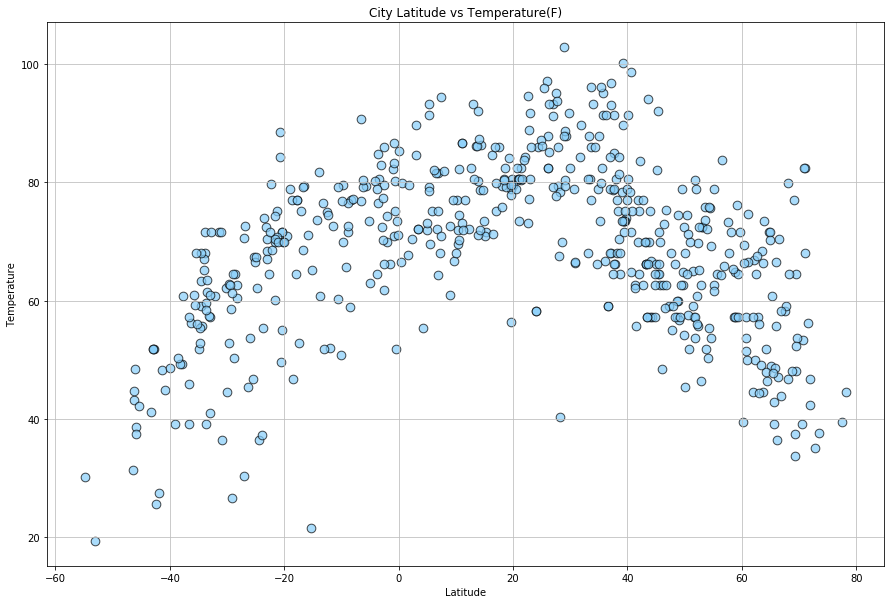

In [7]:
#build a scatter plot based on the columns Latitude and temperature
plt.figure(figsize = (15, 10))
plt.scatter(weather_raw['Latitude'], weather_raw['Maximum Temperature'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()

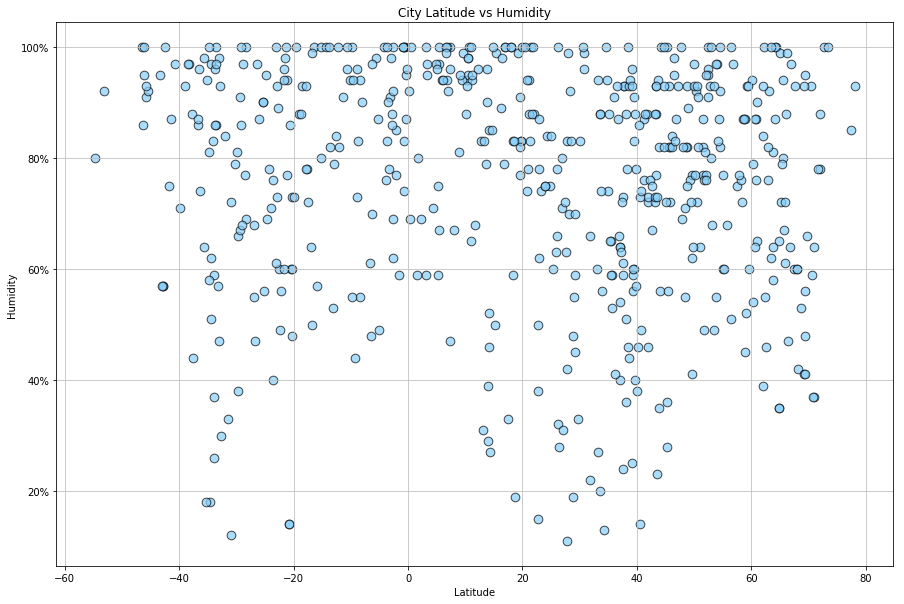

In [8]:
#build a scatter plot based on the columns Latitude and humidity
plt.figure(figsize = (15, 10))
plt.scatter(weather_raw['Latitude'], weather_raw['Humidity'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

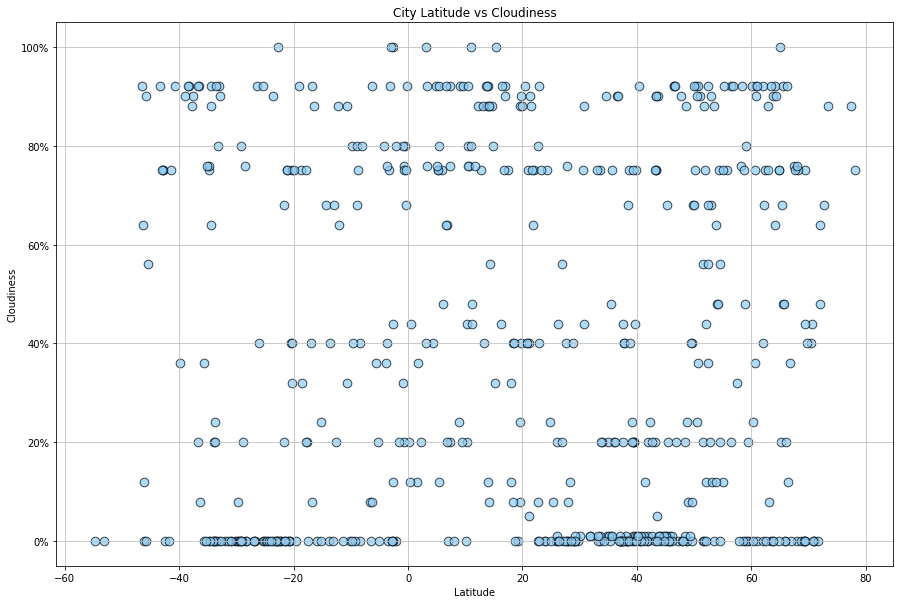

In [10]:
#build a scatter plot based on the columns Latitude and cloudiness
plt.figure(figsize = (15, 10))
plt.scatter(weather_raw['Latitude'], weather_raw['Cloud'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

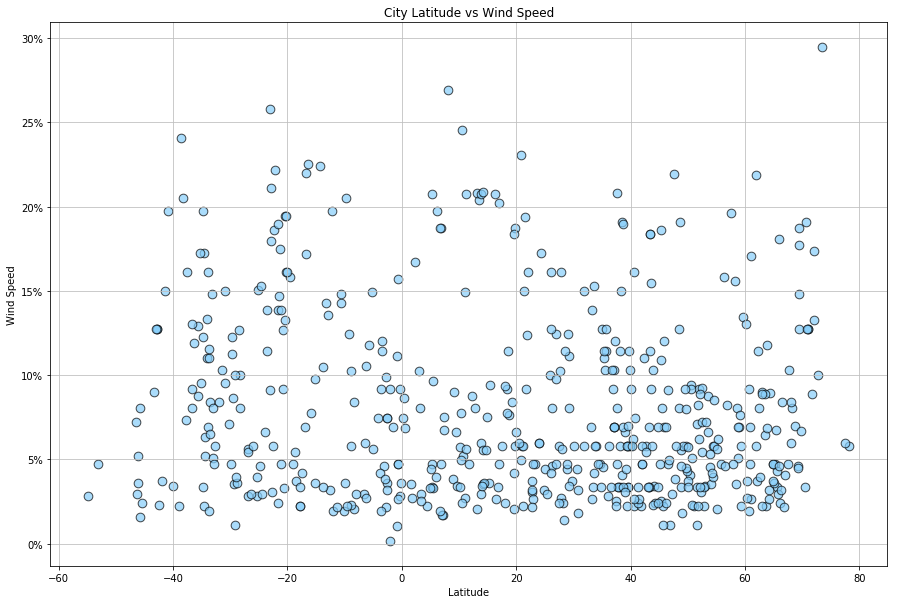

In [11]:
#build a scatter plot based on the columns Latitude and wind speed
plt.figure(figsize = (15, 10))
plt.scatter(weather_raw['Latitude'], weather_raw['Wind Speed'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()